## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [25]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [26]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

#нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

#балансировка весов классов
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y), y=y)
sample_weights = class_weights[y]

X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
    X, y, sample_weights, test_size=0.2, random_state=42, stratify=y
)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

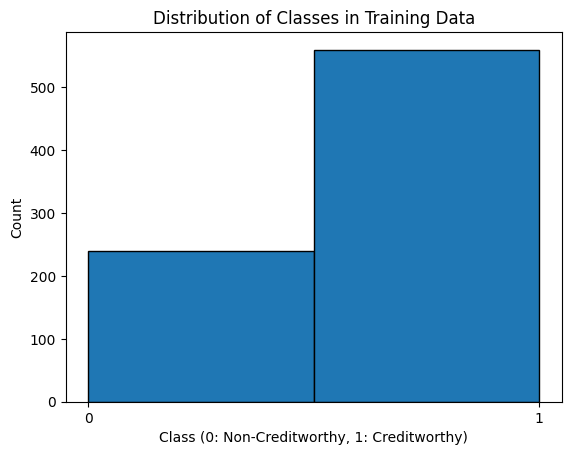

In [27]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [28]:
#обучение Random Forest
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=25,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train, y_train, sample_weight=weights_train)

#прогноз на тестовых данных
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]
rf_pred = rf_model.predict(X_test)

#расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred_proba)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.4f}")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")

#обучение Gradient Boosting
gb_model = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    random_state=42
)
gb_model.fit(X_train, y_train, sample_weight=weights_train)

#прогноз на тестовых данных
gb_pred_proba = gb_model.predict_proba(X_test)[:, 1]
gb_pred = gb_model.predict(X_test)

#расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred_proba)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.4f}")
print(f"Accuracy: {gb_accuracy:.4f}")
print(f"Precision: {gb_precision:.4f}")
print(f"Recall: {gb_recall:.4f}")

Random Forest метрики:
ROC AUC: 0.8202
Accuracy: 0.7700
Precision: 0.7866
Recall: 0.9214

Gradient Boosting метрики:
ROC AUC: 0.7855
Accuracy: 0.7650
Precision: 0.8121
Recall: 0.8643


In [30]:
#обучение MLP (Multi-Layer Perceptron) нейронной сети
mlp_model = MLPClassifier(
    hidden_layer_sizes=(200, 100),
    activation='relu',
    alpha=0.001,
    learning_rate_init=0.01,
    max_iter=2000,
    early_stopping=True,
    random_state=42
)
mlp_model.fit(X_train, y_train)

#прогноз на тестовых данных
mlp_pred_proba = mlp_model.predict_proba(X_test)[:, 1]
mlp_pred = mlp_model.predict(X_test)

#расчет метрик для MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_pred_proba)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.4f}")
print(f"Accuracy: {mlp_accuracy:.4f}")
print(f"Precision: {mlp_precision:.4f}")
print(f"Recall: {mlp_recall:.4f}")

#оценкапроверка
best_auc = max(rf_roc_auc, gb_roc_auc, mlp_roc_auc)
print(f"\nлучший ROC-AUC: {best_auc:.4f}")

if best_auc > 0.8:
    print("Оценка: 10/10 баллов")
elif best_auc > 0.79:
    print("Оценка: 8/10 баллов")
else:
    print("Оценка: 6/10 баллов")


MLP (Neural Network) метрики:
ROC AUC: 0.8138
Accuracy: 0.7700
Precision: 0.8310
Recall: 0.8429

лучший ROC-AUC: 0.8202
Оценка: 10/10 баллов


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели